In [1]:
import numpy as np
import pandas as pd
from fastapi import FastAPI, HTTPException
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from pydantic import BaseModel
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
df = yf.download(tickers = 'RELIANCE.NS', period = '3600d', interval = '1d')

[*********************100%***********************]  1 of 1 completed


(array([[3.593e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.593e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.593e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.593e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.593e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.245e+03, 1.046e+03, 2.030e+02, 6.300e+01, 2.300e+01, 5.000e+00,
         2.000e+00, 5.000e+00, 0.000e+00, 1.000e+00]]),
 array([       0.        ,  8706177.9       , 17412355.8       ,
        26118533.7       , 34824711.6       , 43530889.5       ,
        52237067.40000001, 60943245.3       , 69649423.2       ,
        78355601.10000001, 87

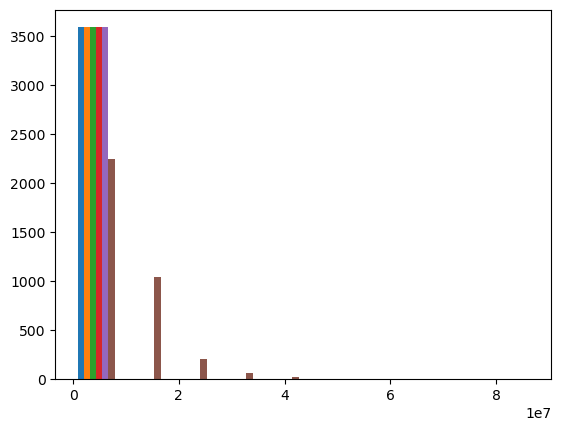

In [3]:
plt.hist(df)

In [4]:
df.shape

(3593, 6)

In [5]:
data = df.filter(["Close"])

dataset = data.values

train_len = int(np.ceil(len(dataset) * 0.9))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[:train_len, :]

seq_len = 90
x_train, y_train = [], []

for i in range(seq_len, len(train_data)):
    x_train.append(train_data[i - seq_len : i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation="linear"))

model.compile(
    optimizer="adam", loss="mean_squared_error", metrics=["mean_squared_error"]
    )
model.fit(x_train, y_train, batch_size=64, epochs=100)

Shape of x_train: (3144, 90)
Shape of y_train: (3144,)
Epoch 1/100
50/50 [==============================] - 16s 262ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 2/100
50/50 [==============================] - 14s 272ms/step - loss: 9.7894e-04 - mean_squared_error: 9.7894e-04
Epoch 3/100
50/50 [==============================] - 14s 275ms/step - loss: 9.8039e-04 - mean_squared_error: 9.8039e-04
Epoch 4/100
50/50 [==============================] - 14s 279ms/step - loss: 9.4414e-04 - mean_squared_error: 9.4414e-04
Epoch 5/100
50/50 [==============================] - 14s 284ms/step - loss: 8.1215e-04 - mean_squared_error: 8.1215e-04
Epoch 6/100
50/50 [==============================] - 14s 288ms/step - loss: 8.5430e-04 - mean_squared_error: 8.5430e-04
Epoch 7/100
50/50 [==============================] - 14s 285ms/step - loss: 8.0217e-04 - mean_squared_error: 8.0217e-04
Epoch 8/100
50/50 [==============================] - 14s 288ms/step - loss: 6.7328e-04 - mean_squared_error: 6.73

50/50 [==============================] - 15s 299ms/step - loss: 3.9852e-04 - mean_squared_error: 3.9852e-04
Epoch 69/100
50/50 [==============================] - 15s 293ms/step - loss: 4.6971e-04 - mean_squared_error: 4.6971e-04
Epoch 70/100
50/50 [==============================] - 14s 289ms/step - loss: 3.8667e-04 - mean_squared_error: 3.8667e-04
Epoch 71/100
50/50 [==============================] - 14s 283ms/step - loss: 4.3409e-04 - mean_squared_error: 4.3409e-04
Epoch 72/100
50/50 [==============================] - 15s 299ms/step - loss: 3.8005e-04 - mean_squared_error: 3.8005e-04
Epoch 73/100
50/50 [==============================] - 15s 303ms/step - loss: 4.6654e-04 - mean_squared_error: 4.6654e-04
Epoch 74/100
50/50 [==============================] - 15s 304ms/step - loss: 4.3183e-04 - mean_squared_error: 4.3183e-04
Epoch 75/100
50/50 [==============================] - 15s 302ms/step - loss: 3.9194e-04 - mean_squared_error: 3.9194e-04
Epoch 76/100
50/50 [=========================

In [6]:
model.save(r"C:\Users\VikashKumarChaudhary\Documents\LSTM/Model_V4.h5")

In [7]:
# Load the test data
from keras.models import load_model
from sklearn.metrics import mean_squared_error

test_data = pd.read_csv(r"C:\Users\VikashKumarChaudhary\Documents\LSTM\zomato1.csv")
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data = test_data.set_index('Date')
test_dataset = test_data.filter(["Close"]).values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_data = scaler.fit_transform(test_dataset)

seq_len = 90
x_test, y_test = [], []
for i in range(seq_len, len(scaled_test_data)):
    x_test.append(scaled_test_data[i - seq_len: i])
    y_test.append(scaled_test_data[i])

x_test, y_test = np.array(x_test), np.array(y_test)

model = load_model(r"C:\Users\VikashKumarChaudhary\Documents\LSTM/Model_V4.h5")

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test, predictions)

accuracy = np.sqrt(mse)

print("RMSE:", accuracy)


12/12 [==============================] - 1s 62ms/step
RMSE: 3.6651979249039304
